In [1]:
#importing pandas
import pandas as pd
#read in the housing data
df = pd.read_csv('house_selling_prices.csv')
df.head()

,House,Taxes,Bedrooms,Baths,Quadrant,NW,Price,Size,Lot
0,1,1360,3,2.0,NW,1,145000,1240,18000
1,2,1050,1,1.0,NW,1,68000,370,25000
2,3,1010,3,1.5,NW,1,115000,1130,25000
3,4,830,3,2.0,SW,0,69000,1120,17000
4,5,2150,3,2.0,NW,1,163000,1710,14000


In [2]:
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats
from scipy.stats import norm

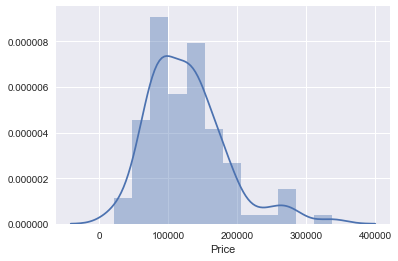

In [3]:
#Plot the distribution for Price
sns.distplot(df["Price"])

In [4]:
#Calculate the Kolmogorov–Smirnov statistic to test for normality
df_price = df["Price"]
stats.kstest(df_price, 'norm', norm.fit(df["Price"]))

KstestResult(statistic=0.092013927930138628, pvalue=0.34610331296867636)

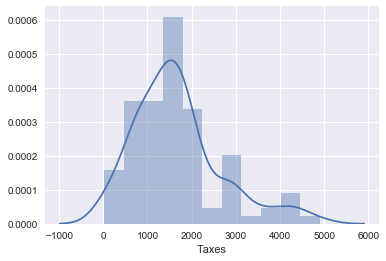

In [5]:
#Plot the distribtion for Taxes
sns.distplot(df["Taxes"])

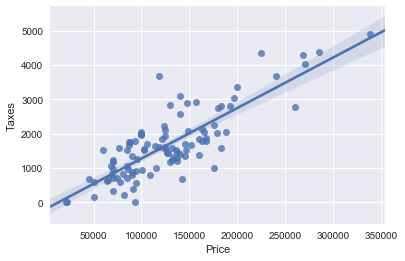

In [6]:
#Plot the Regression for Taxes vs Prices
sns.regplot(x=df["Price"], y=df["Taxes"])

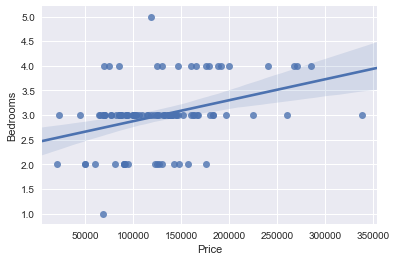

In [7]:
#Plot the regression for Prices vs Bedrooms
sns.regplot(x=df["Price"], y=df["Bedrooms"])

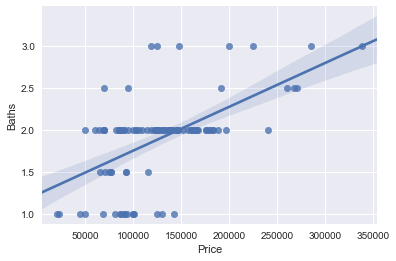

In [8]:
#Plot the regression for Price vs Baths
sns.regplot(x=df["Price"], y=df["Baths"])

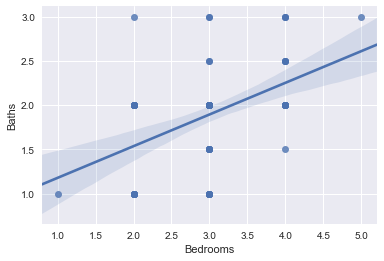

In [9]:
#Plot the regression for Bedrooms vs Baths
sns.regplot(x=df["Bedrooms"], y=df["Baths"])

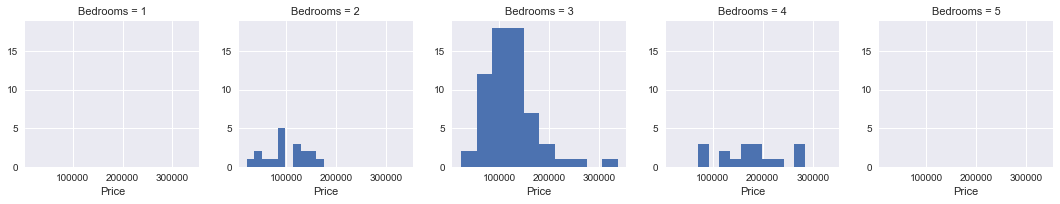

In [10]:
import matplotlib.pyplot as plt

#Plot small multiples for Price with Number of Bedrooms 
multiples = sns.FacetGrid(df, col = "Bedrooms")
multiples = multiples.map(plt.hist, "Price")

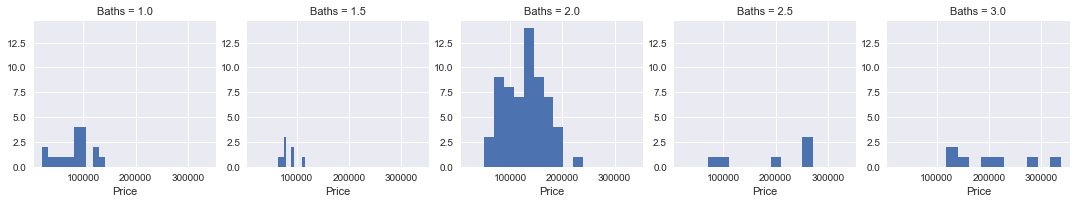

In [11]:
import matplotlib.pyplot as plt

#Plot the small multiples for Price vs Number of Baths
multiples = sns.FacetGrid(df, col = "Baths")
multiples = multiples.map(plt.hist, "Price")

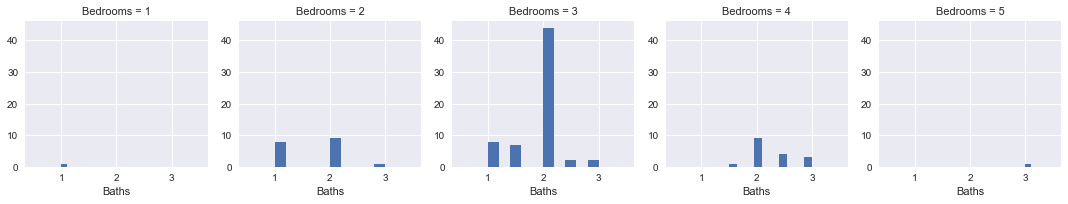

In [12]:
import matplotlib.pyplot as plt

#Plot the small multiples for Baths vs Bedrooms
multiples = sns.FacetGrid(df, col = "Bedrooms")
multiples = multiples.map(plt.hist, "Baths")

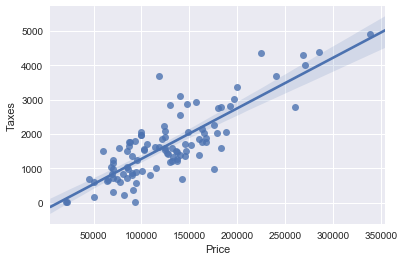

In [13]:
sns.regplot(x='Price', y='Taxes', data=df)

In [14]:
df["Price"].describe()

count       100.000000
mean     126698.000000
std       56356.774718
min       21000.000000
25%       86875.000000
50%      123750.000000
75%      153075.000000
max      338000.000000
Name: Price, dtype: float64

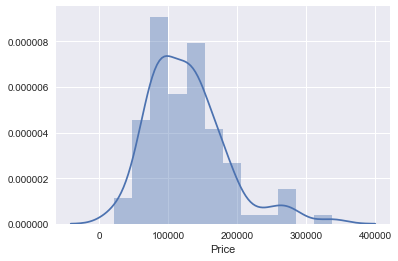

In [15]:
sns.distplot(df["Price"])

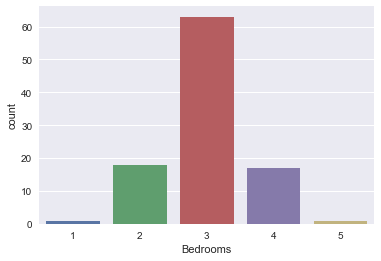

In [16]:
bedroom_count = df["Bedrooms"].value_counts()
sns.countplot(df["Bedrooms"])

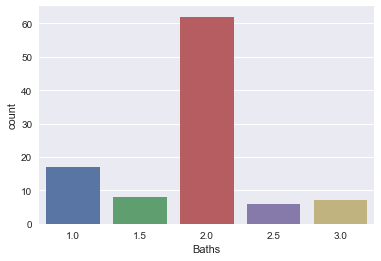

In [17]:
sns.countplot(df["Baths"])

In [18]:
df.head()

,House,Taxes,Bedrooms,Baths,Quadrant,NW,Price,Size,Lot
0,1,1360,3,2.0,NW,1,145000,1240,18000
1,2,1050,1,1.0,NW,1,68000,370,25000
2,3,1010,3,1.5,NW,1,115000,1130,25000
3,4,830,3,2.0,SW,0,69000,1120,17000
4,5,2150,3,2.0,NW,1,163000,1710,14000


In [19]:
import statsmodels.api as sm

X = df["Price"]
Y = df["Taxes"]

model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Taxes   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1036.
Date:                Mon, 16 Apr 2018   Prob (F-statistic):           3.07e-54
Time:                        15:00:16   Log-Likelihood:                -777.35
No. Observations:                 100   AIC:                             1557.
Df Residuals:                      99   BIC:                             1559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Price          0.0134      0.000     32.184      0.0

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [20]:
df.head()

,House,Taxes,Bedrooms,Baths,Quadrant,NW,Price,Size,Lot
0,1,1360,3,2.0,NW,1,145000,1240,18000
1,2,1050,1,1.0,NW,1,68000,370,25000
2,3,1010,3,1.5,NW,1,115000,1130,25000
3,4,830,3,2.0,SW,0,69000,1120,17000
4,5,2150,3,2.0,NW,1,163000,1710,14000


In [21]:
import statsmodels.api as sm

Y = df["Price"]
X = df[["Bedrooms", "Taxes", "Baths", "Size", "Lot"]]

model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     475.7
Date:                Mon, 16 Apr 2018   Prob (F-statistic):           1.39e-65
Time:                        15:00:16   Log-Likelihood:                -1162.8
No. Observations:                 100   AIC:                             2336.
Df Residuals:                      95   BIC:                             2349.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Bedrooms   -5084.7061   4141.321     -1.228      0.2

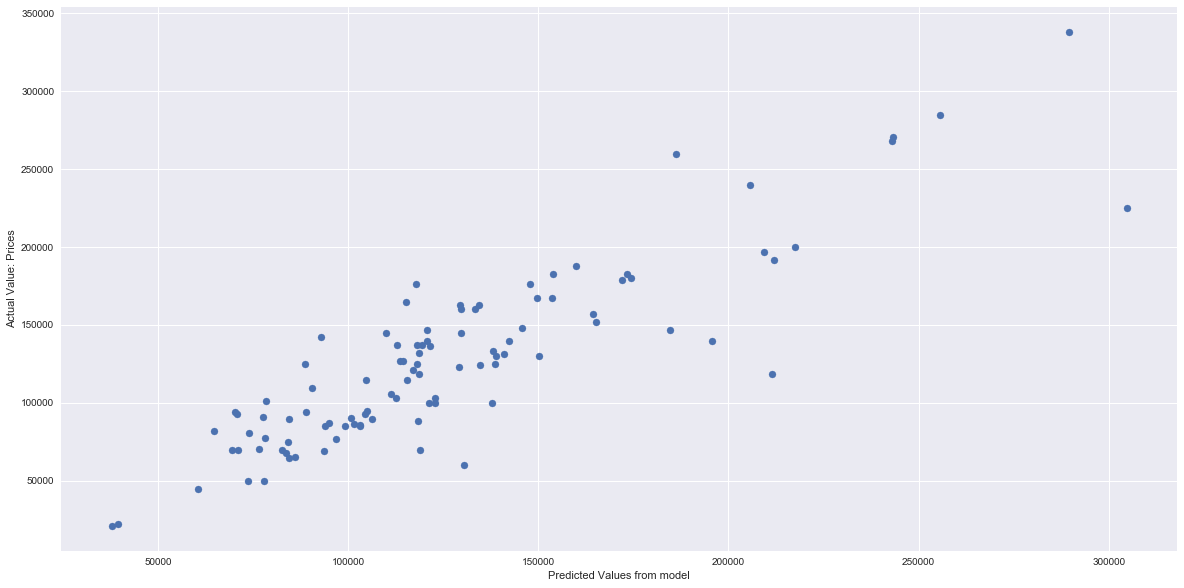

In [22]:
predictions = model.predict(X)
plt.figure(figsize = (20,10))
plt.scatter(predictions, Y)
plt.xlabel("Predicted Values from model")
plt.ylabel("Actual Value: Prices")
plt.show()

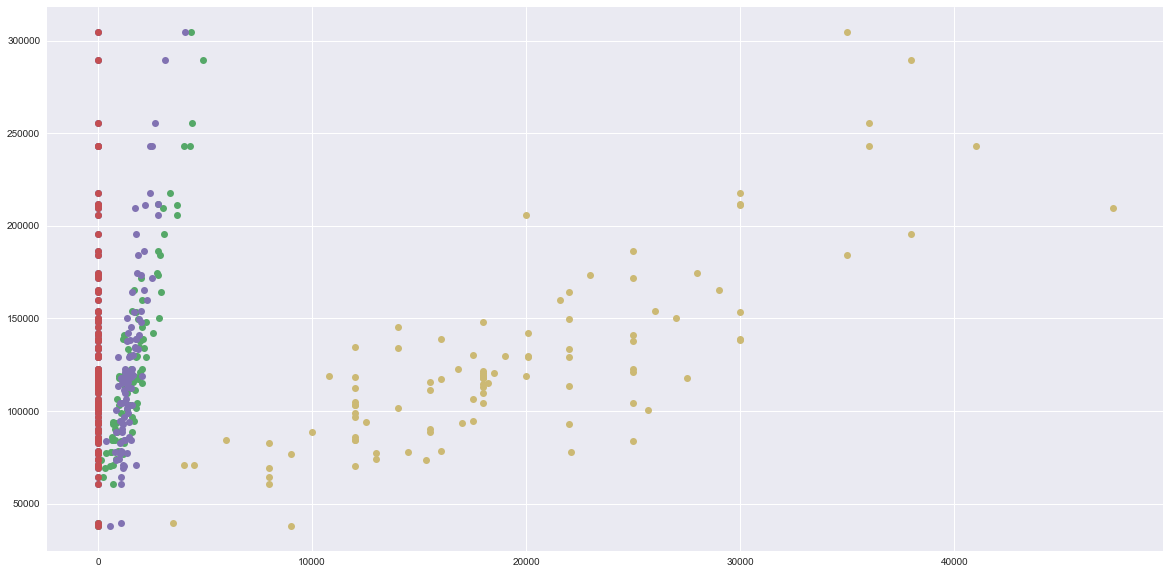

In [23]:
plt.figure(figsize=(20,10))
plt.plot(X, model.fittedvalues, 'o')
plt.show()

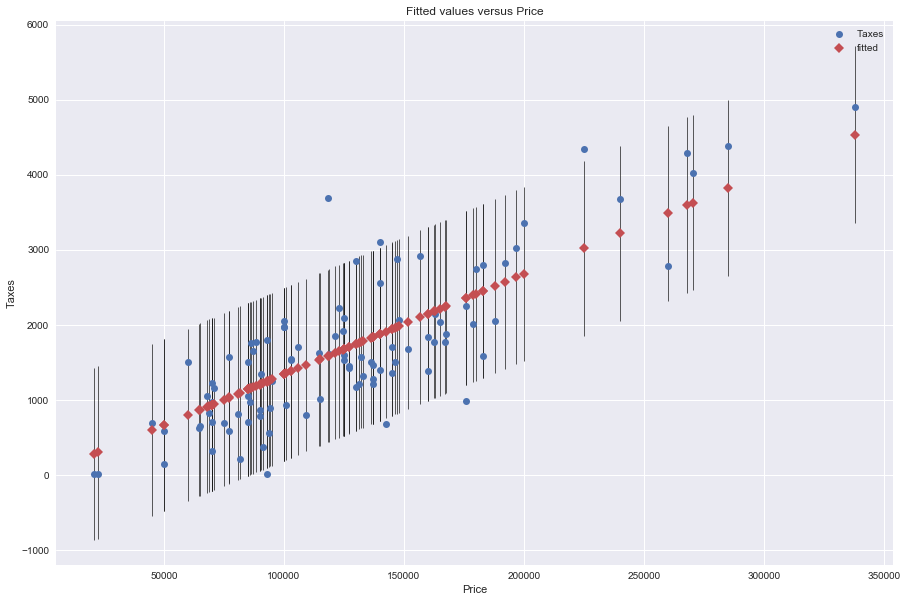

In [24]:
X = df["Price"]
Y = df["Taxes"]

m1 = sm.OLS(Y,X).fit()

fig, ax = plt.subplots(figsize=(15,10))
fig = sm.graphics.plot_fit(m1, 0, ax=ax)

In [25]:
predictions.head()

0    109828.635348
1     83752.639139
2    104598.734843
3     93609.961317
4    134327.245291
dtype: float64

In [26]:
df["Price"].head()

0    145000
1     68000
2    115000
3     69000
4    163000
Name: Price, dtype: int64

In [27]:
import statsmodels.api as sm

Y = df["Price"]
X = df[["Bedrooms", "Taxes", "Baths", "Size", "Lot"]]

multi_model = sm.OLS(Y,X).fit()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     475.7
Date:                Mon, 16 Apr 2018   Prob (F-statistic):           1.39e-65
Time:                        15:00:48   Log-Likelihood:                -1162.8
No. Observations:                 100   AIC:                             2336.
Df Residuals:                      95   BIC:                             2349.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Bedrooms   -5084.7061   4141.321     -1.228      0.2

In [28]:
print("Making predictions for the following 5 houses:")
print(X.head())

Making predictions for the following 5 houses:
   Bedrooms  Taxes  Baths  Size    Lot
0         3   1360    2.0  1240  18000
1         1   1050    1.0   370  25000
2         3   1010    1.5  1130  25000
3         3    830    2.0  1120  17000
4         3   2150    2.0  1710  14000


In [29]:
print("The predictions are")
print(multi_model.predict(X.head()))

The predictions are
0    109828.635348
1     83752.639139
2    104598.734843
3     93609.961317
4    134327.245291
dtype: float64


In [33]:
df["Price"][:5]

0    145000
1     68000
2    115000
3     69000
4    163000
Name: Price, dtype: int64

In [30]:
predictors = pd.Series([3, 1600, 2, 1300, 20000])
pred_df = pd.DataFrame([predictors.values], columns = X.columns.values.tolist(), dtype='float')
pred_df

,Bedrooms,Taxes,Baths,Size,Lot
0,3.0,1600.0,2.0,1300.0,20000.0


In [31]:
print("Predicted price is: ")
print(multi_model.predict(pred_df))

Predicted price is: 
0    119996.84393
dtype: float64


In [35]:
import sklearn.cross_validation

X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,Y, test_size=0.2, random_state=5)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(80, 5)
(80,)
(20, 5)
(20,)


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [60]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_train)
Y_pred[:5]

array([ 184896.14049438,   71691.26316648,   95543.66744196,
        127042.36337295,  201112.10606984])

In [61]:
#From trained data: 80% split
print(sklearn.metrics.mean_squared_error(Y_train, lm.predict(X_train)))

801739354.811


In [62]:
#From test data: 20% split
print(sklearn.metrics.mean_squared_error(Y_test, lm.predict(X_test)))

568401316.364


Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

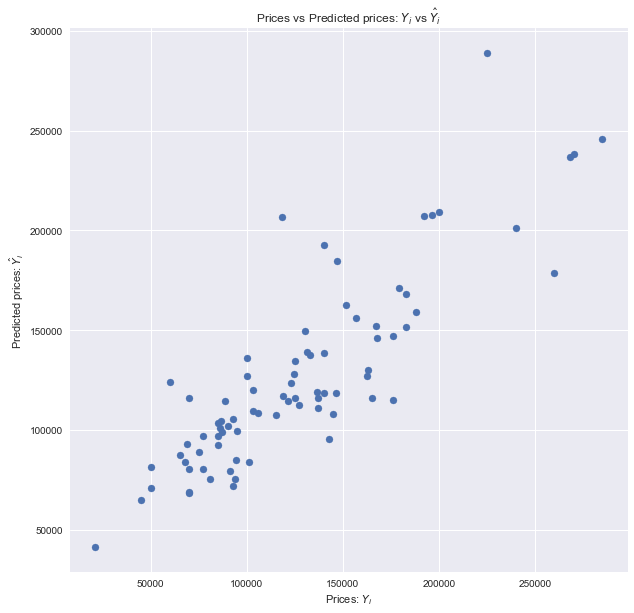

In [63]:
plt.figure(figsize=(10,10))
plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [43]:
mse = sklearn.metrics.mean_squared_error(X_train, Y_train)
print(mse)

ValueError: y_true and y_pred have different number of output (5!=1)

In [41]:
print(lm.predict(X_test))

[  77641.67229075  170605.64066152  109276.39950613  132016.8581198
  134660.66227478  126907.51028142   83326.32543806  103476.53787894
   44639.09013177  141759.57728294  116272.68461226   88318.95763939
  117423.67448423  125592.04696406   63972.2038902   274856.26679214
  127197.69118584   89686.46725386  112906.55138967   78642.77927507]


In [ ]:
mse = sklearn.metrics.mean_squared_error(X_test, )
print(mse)